# This notebook is prepared by ApplAi's Technical And Training Depratment. 
- Please Don't use it outside the training without asking for permission as it's considered as Violation of Intellectual property rights

![ApplAi's Logo](https://media-exp1.licdn.com/dms/image/C4E0BAQHGLGltI2rzuQ/company-logo_200_200/0?e=2159024400&v=beta&t=adq8rNV09dPC6egdJMnfARt6Aq0TC9bSomFvFtm50WM)

### Task 1: Importing libraries and Exploring the Dataset.

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project .

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

### Task 4: creat a model that fits the data

### Task 5: creating an accurecy table


### 

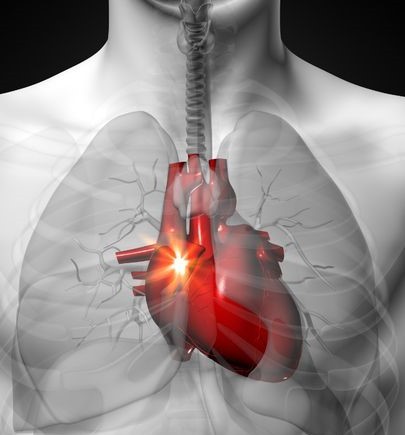

### Task 1: Importing libraries and Exploring the Dataset.

In [104]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Task 2: Definining Exploratory Data Analysis with an overview of the whole project 

In [105]:
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('heart_disease.csv')
df.head()

Saving heart_disease.csv to heart_disease (2).csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [106]:
#number of rows and columns
df.shape

(303, 14)

In [107]:
#getting some info from data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [108]:
df.dtypes #one differnet data type (float)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [109]:
#statistics description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [110]:
#get the count of Target
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


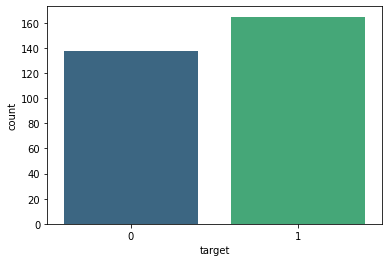

In [111]:
#show the figure for target 
# "0" for non disease and "1" for "disease"
sns.countplot(df['target'],label='count',palette='viridis')

In [112]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


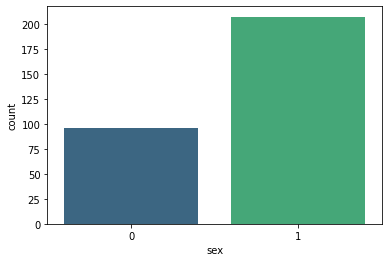

In [113]:
# "0" for females and "1" for males
sns.countplot(df['sex'],label='count',palette='viridis')

In [114]:
Female = len(df[df.sex == 0])
Male = len(df[df.sex == 1])
print("Percentage of Female Patients: {:.2f}%".format((Female / (len(df.sex))*100)))
print("Percentage of Male Patients: {:.2f}%".format((Male / (len(df.sex))*100)))

Percentage of Female Patients: 31.68%
Percentage of Male Patients: 68.32%


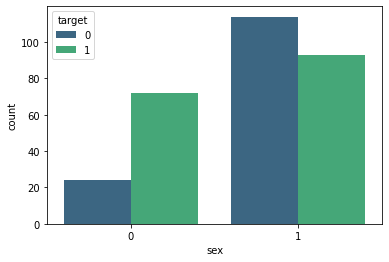

In [115]:
sns.countplot(x='sex', data=df, hue="target", palette='viridis')

In [116]:
#get the coorelation of the columns
df.iloc[:,1:14].corr()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696
slope,-0.030711,0.119717,-0.121475,-0.004038,-0.059894,0.093045,0.386784,-0.257748,-0.577537,1.000000,-0.080155,-0.104764,0.345877


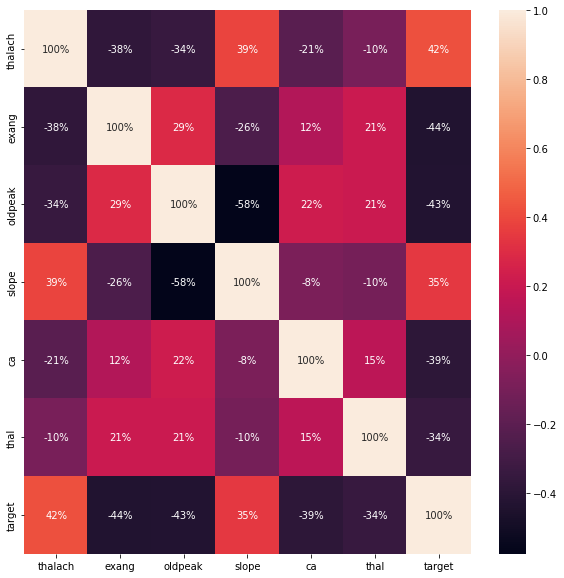

In [117]:
#visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,7:14].corr(),annot=True,fmt='.0%')

### Task 3: Checking missing values and Outliers & Creating visual methods to analyze the data.

In [118]:
#checking for missing values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [119]:
df.duplicated().sum()

1

In [120]:
df.drop_duplicates(subset=None,inplace=True) #remove dublicate rows
df.duplicated().sum()

0

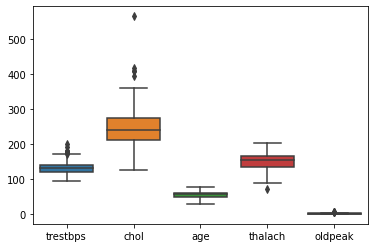

In [121]:
#check outliers
sns.boxplot(data=df[['trestbps','chol','age','thalach','oldpeak']])

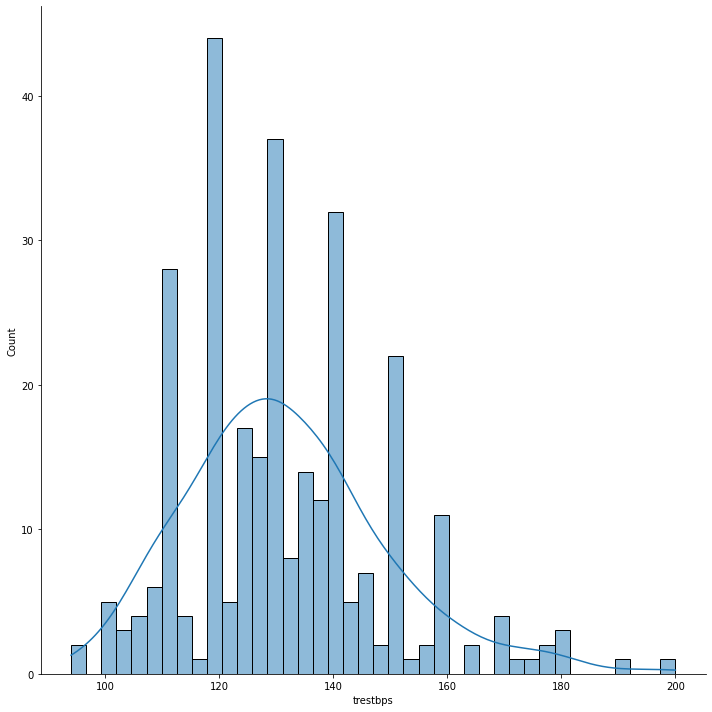

In [122]:
#sekewed before detecting outliers
sns.displot(df['trestbps'], kde=True, bins=40,height=10)

In [123]:
#detect outliers
columns = ['age',	'sex',	'cp',	'trestbps',	'chol',	'fbs',	'restecg',	'thalach',	'exang',	'oldpeak',	'slope',	'ca',	'thal',	'target']
for col in columns:
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    df.drop(index_label, inplace=True)

Number of outliers in age: 0
Number of outliers in sex: 0
Number of outliers in cp: 0
Number of outliers in trestbps: 9
Number of outliers in chol: 5
Number of outliers in fbs: 40
Number of outliers in restecg: 0
Number of outliers in thalach: 1
Number of outliers in exang: 0
Number of outliers in oldpeak: 4
Number of outliers in slope: 0
Number of outliers in ca: 14
Number of outliers in thal: 1
Number of outliers in target: 0


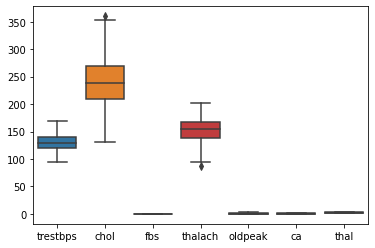

In [124]:
#check outliers
sns.boxplot(data=df[['trestbps','chol','fbs','thalach','oldpeak','ca','thal']])

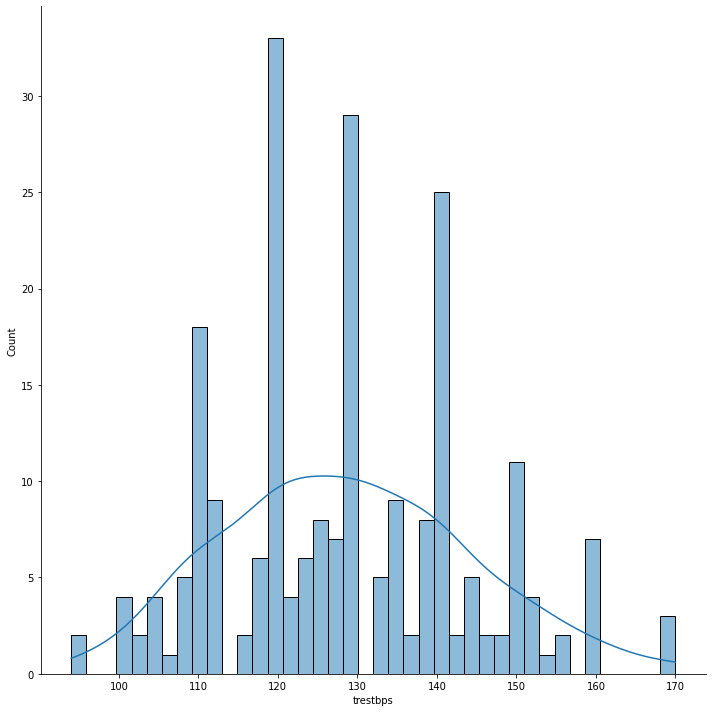

In [125]:
#sekewed after detecting outliers 
sns.displot(df['trestbps'], kde=True, bins=40,height=10)

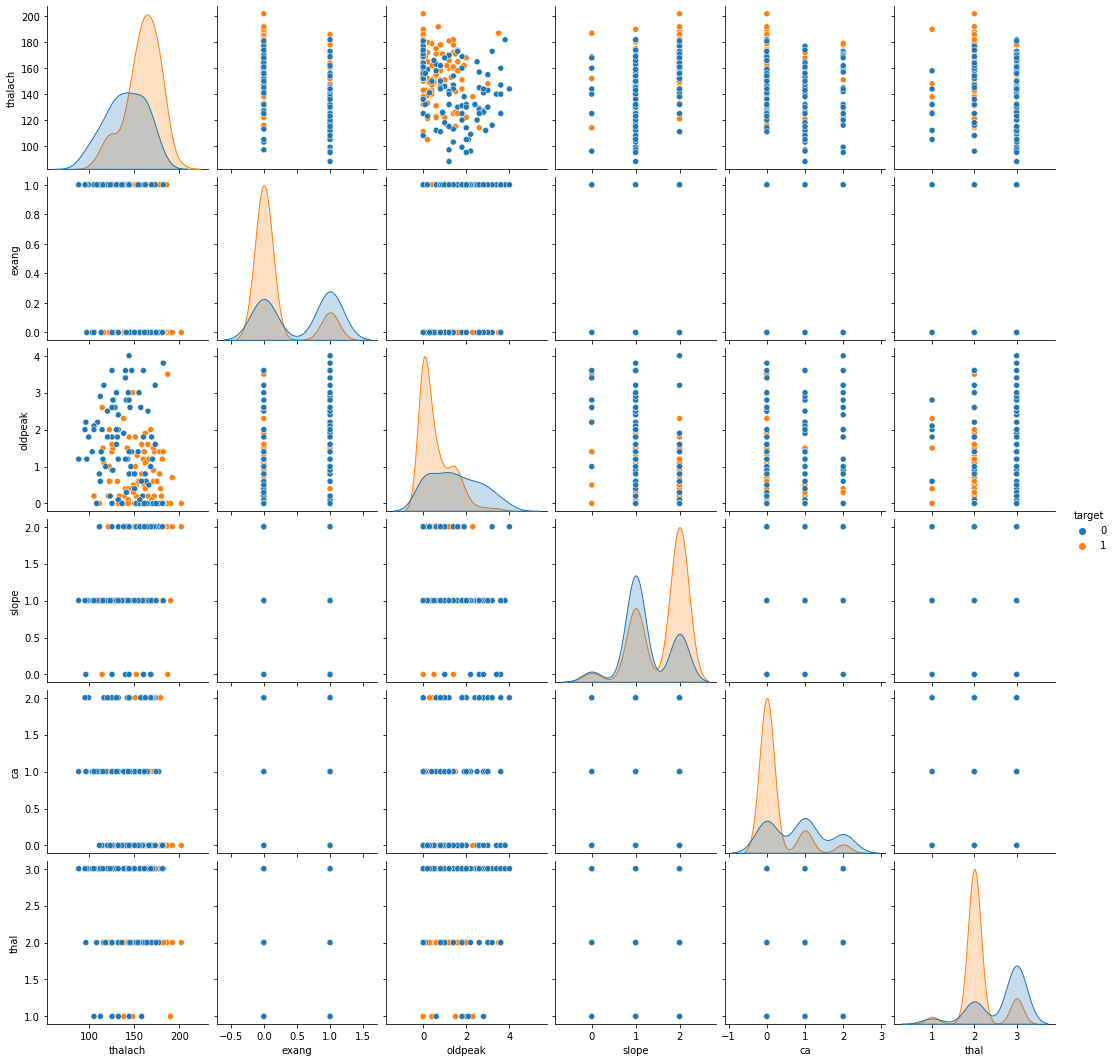

In [126]:
#create a pair plot
sns.pairplot(df.iloc[:,7:14],hue='target')

**Split Data & Train w Test**

In [127]:
x=df.drop(columns='target',axis=1)
y=df['target']

In [128]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=0)

In [129]:
print(x.shape,x_train.shape,x_test.shape)

(228, 13) (182, 13) (46, 13)


### Task 4: creat a model that fits the data

In [130]:
#create a function for the models
def models(x_train,y_train):
  #logistic regression
  log = LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  #descision tree
  tree=DecisionTreeClassifier(criterion= 'entropy',random_state=0)
  tree.fit(x_train,y_train)


  #random forest
  forest=RandomForestClassifier(n_estimators= 10,criterion='entropy',random_state=0)
  forest.fit(x_train,y_train)


  #knn
  knn=KNeighborsClassifier(n_neighbors=3)
  knn.fit(x_train,y_train)

#print models
  print('[0]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
  print('[1]Decision Tree Classifier Training Accuracy:',tree.score(x_train,y_train))
  print('[2]Random Forest Classifier Training Accuracy:',forest.score(x_train,y_train))
  print('[3]KNN Classifier Training Accuracy:',knn.score(x_train,y_train))

  return log ,tree,forest,knn


In [131]:
# getting all of the models
model=models(x_train,y_train)

[0]Logistic Regression Training Accuracy: 0.8956043956043956
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 1.0
[3]KNN Classifier Training Accuracy: 0.8076923076923077


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Task 5: creating an accurecy table

In [132]:
#test model accuracy on test data on confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
  print('Model',i)
  cm =confusion_matrix(y_test,model[i].predict(x_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print (cm)
  print('Testing Accuracy = ',(TP + TN)/(TP +TN +FN +FP))
  print()



Model 0
[[12  7]
 [ 0 27]]
Testing Accuracy =  0.8478260869565217

Model 1
[[10  9]
 [ 1 26]]
Testing Accuracy =  0.782608695652174

Model 2
[[12  7]
 [ 2 25]]
Testing Accuracy =  0.8043478260869565

Model 3
[[ 7 12]
 [ 4 23]]
Testing Accuracy =  0.6521739130434783



In [133]:
#Show another way to get metrics of the models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model',i)
  print (classification_report(y_test,model[i].predict(x_test)))
  print( accuracy_score(y_test,model[i].predict(x_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       1.00      0.63      0.77        19
           1       0.79      1.00      0.89        27

    accuracy                           0.85        46
   macro avg       0.90      0.82      0.83        46
weighted avg       0.88      0.85      0.84        46

0.8478260869565217

Model 1
              precision    recall  f1-score   support

           0       0.91      0.53      0.67        19
           1       0.74      0.96      0.84        27

    accuracy                           0.78        46
   macro avg       0.83      0.74      0.75        46
weighted avg       0.81      0.78      0.77        46

0.782608695652174

Model 2
              precision    recall  f1-score   support

           0       0.86      0.63      0.73        19
           1       0.78      0.93      0.85        27

    accuracy                           0.80        46
   macro avg       0.82      0.78      0.79        46
weighted av

In [134]:
log=LogisticRegression(random_state=0)
log.fit(x_train,y_train)
import joblib
joblib_file="Heart_Disease_model"
joblib.dump(log,joblib_file)

loaded_model=joblib.load(open(joblib_file,'rb'))
x_test_pred=loaded_model.predict(x_test)
result=np.round(accuracy_score(y_test,x_test_pred),2)
print(result)

0.85


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
